Connecting to Sql

In [42]:
from sqlalchemy import create_engine
import pandas as pd

username = 'postgres'
password = 'SQLMINE'
host = 'localhost'
port = '5432'
database = 'clothing_factory'

engine = create_engine(f'postgresql+psycopg2://{username}:{password}@{host}:{port}/{database}')

if engine.connect():
    print('Connected')

Connected


Writing Queries and extracting Data

In [43]:
query = 'select * from customer'

customers = pd.read_sql(query,engine)

customers.head()

,customer_id,name,phone,email,address
0,1,Shine,9447000001,shine@example.com,"Kochi, Ernakulam"
1,2,Sami,9447000002,sami@example.com,"Thiruvananthapuram, Kerala"
2,3,Deepu,9447000003,deepu@example.com,"Kozhikode, Kerala"
3,4,Neena,9447000004,neena@example.com,"Kollam, Kerala"
4,5,Ammu,9447000005,ammu@example.com,"Palakkad, Kerala"


In [44]:
query = 'select * from employees'

employees = pd.read_sql(query,engine)

employees.head()

,employee_id,name,role,salary,hire_date
0,1,Arun,Manager,50000.0,2025-02-09
1,2,Neethu,Sales,30000.0,2025-02-09
2,3,Ravi,Factory Worker,20000.0,2025-02-09
3,4,Anoop,Supervisor,35000.0,2025-02-09
4,5,Manju,Sales,27000.0,2025-02-09


In [45]:
query = 'select * from inventory'

inventory = pd.read_sql(query,engine)

inventory.head() 

,item_id,name,category,quantity,supplier_id,price_per_unit
0,2,Silk Fabric,Fabric,500,2,150.0
1,3,Linen Fabric,Fabric,800,3,100.0
2,4,Woolen Fabric,Fabric,300,4,200.0
3,5,Polyester Fabric,Fabric,700,5,60.0
4,6,Denim Fabric,Fabric,400,6,120.0


In [46]:
query = 'select * from order_items'

order_items = pd.read_sql(query,engine)

order_items.head() 

,order_item_id,order_id,item_id,quantity,price
0,21,1,1,100,50.0
1,22,1,2,50,150.0
2,23,1,13,10,5.0
3,24,2,3,70,100.0
4,25,2,14,20,8.0


In [47]:
query = 'select * from orders'

orders = pd.read_sql(query,engine)

orders.head() 

,order_id,customer_id,order_date,total_amount
0,1,1,2025-02-05,6500.0
1,2,2,2025-02-06,10500.0
2,3,3,2025-02-07,11000.0
3,4,4,2025-02-08,8000.0
4,5,5,2025-02-09,9800.0


In [48]:
query = 'select * from suppliers'

suppliers = pd.read_sql(query,engine)

suppliers.head() 

,supplier_id,name,contact,material_supplied
0,1,Kerala Textiles,contact@keralatextiles.com,Cotton Fabrics
1,2,Malabar Fabrics,contact@malabarfabrics.com,Silk Fabrics
2,3,Kochi Fabrics,contact@kochifabrics.com,Linen Fabrics
3,4,Trivandrum Textiles,contact@trivandrumtextiles.com,Woolen Fabrics
4,5,Thrissur Silks,contact@thrissursilks.com,Silk Fabrics


In [49]:
query = 'select * from textile_shops'

textile_shops = pd.read_sql(query,engine)

textile_shops.head() 

,shop_id,name,shop_type,location
0,1,Shree Textile,wholesale,"Kochi, Ernakulam"
1,2,Kochi Fabrics,retail,"Kochi, Ernakulam"
2,3,Trissur Textiles,wholesale,"Thrissur, Kerala"
3,4,Malabar Silks,retail,"Kozhikode, Kerala"
4,5,Kottayam Textiles,wholesale,"Kottayam, Kerala"


In [50]:
query = 'select * from transactions'

transactions = pd.read_sql(query,engine)

transactions.head() 

,transaction_id,order_id,transaction_date,amount,payment_method
0,1,1,2025-02-09 15:05:20.062923,6500.0,online
1,2,2,2025-02-09 15:05:20.062923,10500.0,credit
2,3,3,2025-02-09 15:05:20.062923,11000.0,online
3,4,4,2025-02-09 15:05:20.062923,8000.0,credit
4,5,5,2025-02-09 15:05:20.062923,9800.0,cash


Perform analysis on Retrieved Data

In [51]:
print(orders.describe(),'\n')

print(customers.describe(),'\n')

print(order_items.describe(),'\n')

       order_id  customer_id           order_date  total_amount
count  10.00000     10.00000                   10     10.000000
mean    5.50000      5.50000  2025-02-09 12:00:00   9500.000000
min     1.00000      1.00000  2025-02-05 00:00:00   6500.000000
25%     3.25000      3.25000  2025-02-07 06:00:00   8250.000000
50%     5.50000      5.50000  2025-02-09 12:00:00   9550.000000
75%     7.75000      7.75000  2025-02-11 18:00:00  10325.000000
max    10.00000     10.00000  2025-02-14 00:00:00  13500.000000
std     3.02765      3.02765                  NaN   1960.158724 

       customer_id
count     20.00000
mean      10.50000
std        5.91608
min        1.00000
25%        5.75000
50%       10.50000
75%       15.25000
max       20.00000 

       order_item_id   order_id    item_id    quantity       price
count       20.00000  20.000000  20.000000   20.000000   20.000000
mean        30.50000   5.050000  11.450000   44.500000   69.025000
std          5.91608   2.910507   5.404433   36.

Top 10 Orders by Total Amount

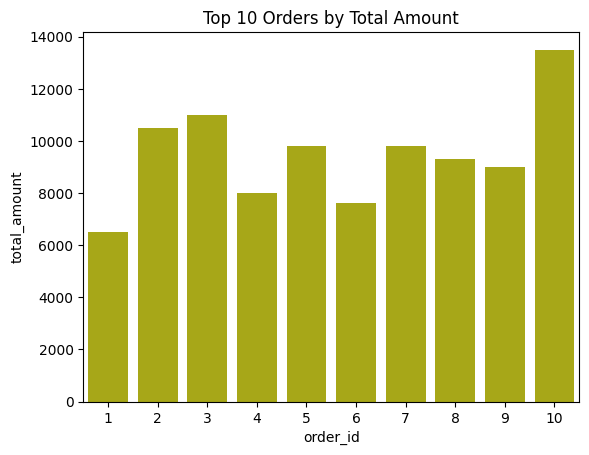

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt

top_orders = orders.sort_values(by='total_amount', ascending=False).head(10)
sns.barplot(x='order_id', y='total_amount', data=top_orders,color='y')
plt.title("Top 10 Orders by Total Amount")
plt.show()


Customer Distribution by Location

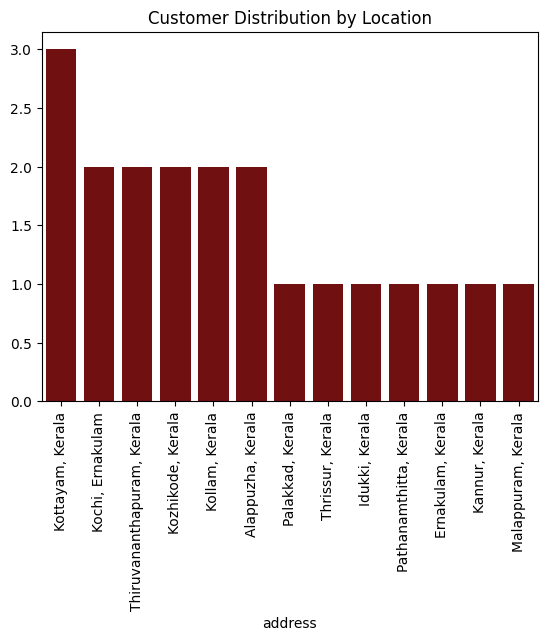

In [53]:
location_distribution = customers['address'].value_counts()
sns.barplot(x=location_distribution.index, y=location_distribution.values,color='maroon')
plt.xticks(rotation=90)
plt.title("Customer Distribution by Location")
plt.show()

Salary Distribution of Employees

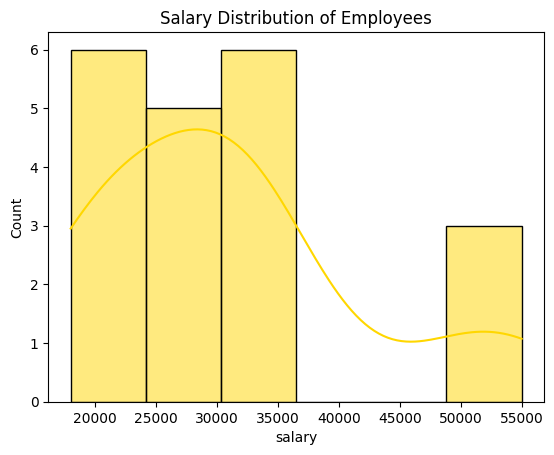

In [54]:
sns.histplot(employees['salary'], kde=True,color='gold')
plt.title("Salary Distribution of Employees")
plt.show()

Employee Distribution by Role

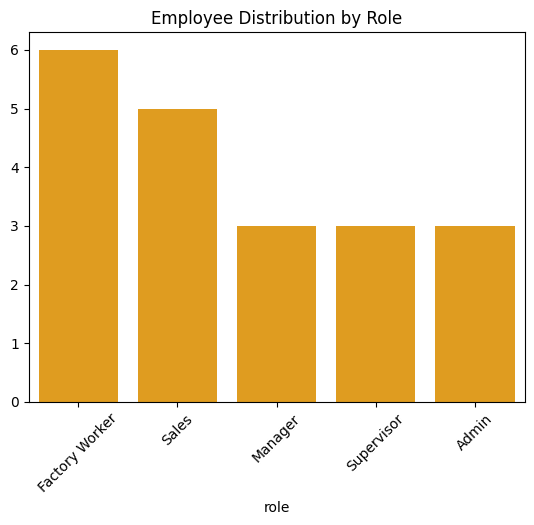

In [55]:
role_distribution = employees['role'].value_counts()
sns.barplot(x=role_distribution.index, y=role_distribution.values,color='orange')
plt.title("Employee Distribution by Role")
plt.xticks(rotation=45)
plt.show()

Top 5 Highest Paid Employees

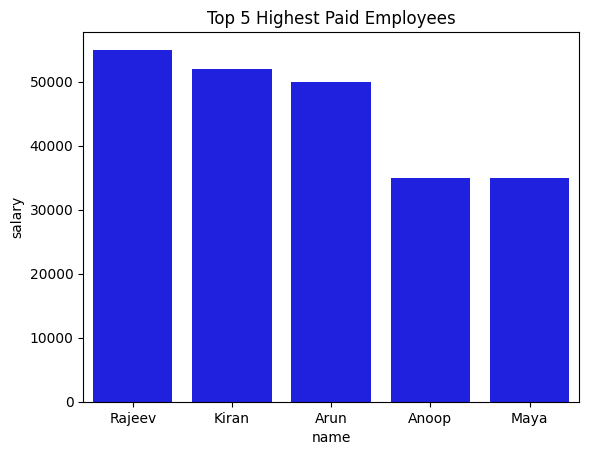

In [56]:
top_paid_employees = employees.sort_values(by='salary', ascending=False).head(5)
sns.barplot(x='name', y='salary', data=top_paid_employees,color='blue')
plt.title("Top 5 Highest Paid Employees")
plt.show()

Payment Method Distribution

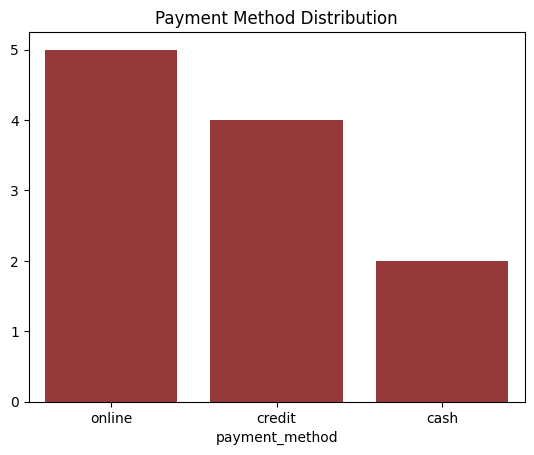

In [57]:
payment_method_distribution = transactions['payment_method'].value_counts()
sns.barplot(x=payment_method_distribution.index, y=payment_method_distribution.values,color='brown')
plt.title("Payment Method Distribution")
plt.show()

Suppliers Distribution by Material Supplied

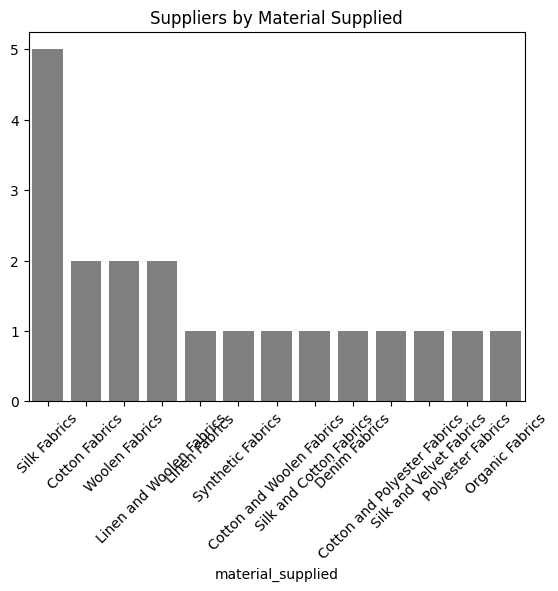

In [58]:
material_distribution = suppliers['material_supplied'].value_counts()
sns.barplot(x=material_distribution.index, y=material_distribution.values,color='grey')
plt.xticks(rotation=45)
plt.title("Suppliers by Material Supplied")
plt.show()

Distribution of Shops by Type

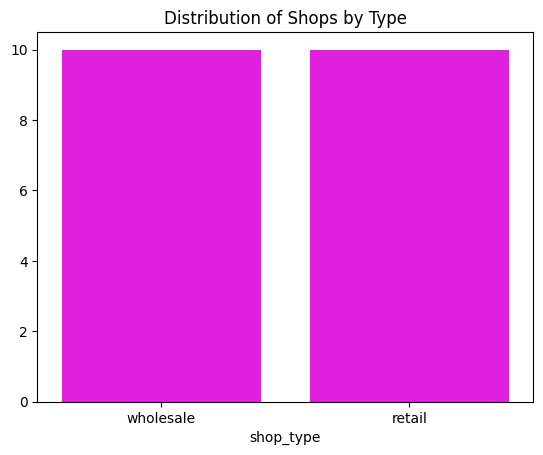

In [59]:
shop_type_distribution = textile_shops['shop_type'].value_counts()
sns.barplot(x=shop_type_distribution.index, y=shop_type_distribution.values,color='magenta')
plt.title("Distribution of Shops by Type")
plt.show()

Inventory Value by Item

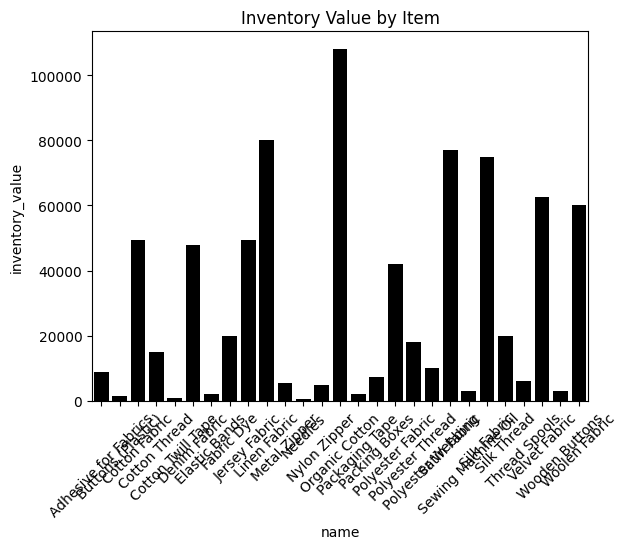

In [60]:
inventory['inventory_value'] = inventory['quantity'] * inventory['price_per_unit']
item_inventory_value = inventory.groupby('name')['inventory_value'].sum().reset_index()
sns.barplot(x='name', y='inventory_value', data=item_inventory_value,color='black')
plt.xticks(rotation=45)
plt.title("Inventory Value by Item")
plt.show()